Текущий порог контраста: 0.2
keypoints: 292
Новый порог контраста: 0.4
keypoints: 44


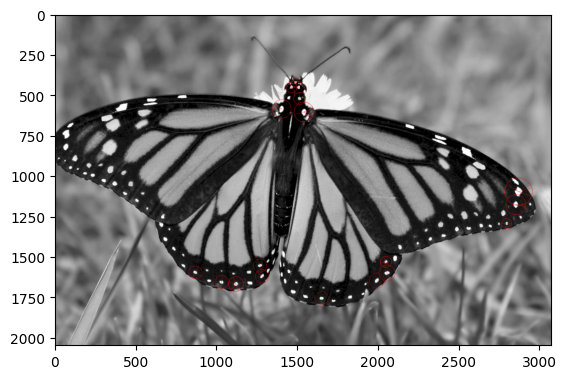

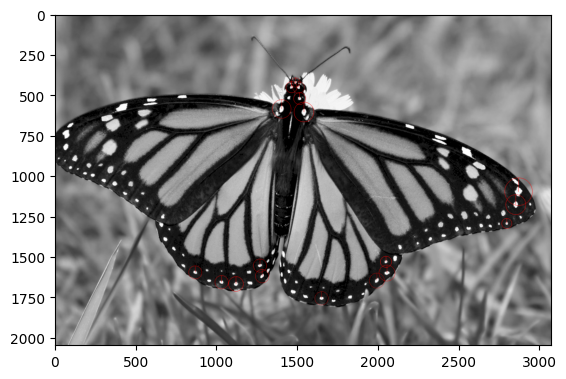

Размер дескриптора: 128
Форма дескрипторов: (44, 128)


In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('10_home/fly.png', cv.IMREAD_GRAYSCALE)
# surf = cv.xfeatures2d.SURF_create(400)
# kp, des = surf.detectAndCompute(img,None)
sift = cv.SIFT_create()
sift.setContrastThreshold(0.2)

keypoints, descriptors = sift.detectAndCompute(img, None)
print("Текущий порог контраста:", sift.getContrastThreshold())
print("keypoints:", len(keypoints))


sift.setContrastThreshold(0.4)
print("Новый порог контраста:", sift.getContrastThreshold())
keypoints, descriptors = sift.detectAndCompute(img, None)
print("keypoints:", len(keypoints))

for kp in keypoints:
    kp.size *= 6

img2 = cv.drawKeypoints(img, keypoints, None, (255, 0, 0), 4)
plt.imshow(img2)
plt.show()

for kp in keypoints:
    kp.angle = 270

img3 = cv.drawKeypoints(img, keypoints, None, (255, 0, 0), 4)
plt.imshow(img3)
plt.show()

print("Размер дескриптора:", descriptors.shape[1])
print("Форма дескрипторов:", descriptors.shape)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 7157
Total Keypoints without nonmaxSuppression: 15092


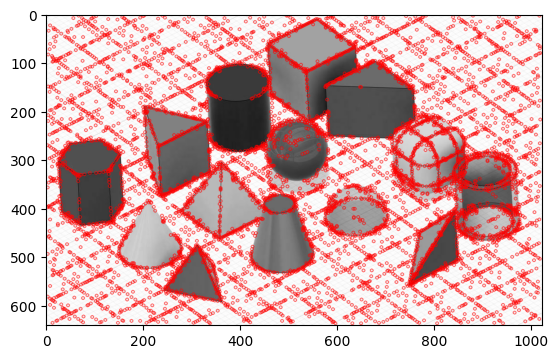

(<matplotlib.image.AxesImage at 0x7fa728f70a30>, None)

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
# `<opencv_root>/samples/data/blox.jpg`
img = cv.imread('simple.jpeg', cv.IMREAD_GRAYSCALE)
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img, None)
img2 = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))
# Print all default params
print("Threshold: {}".format(fast.getThreshold()))
print("nonmaxSuppression:{}".format(fast.getNonmaxSuppression()))
print("neighborhood: {}".format(fast.getType()))
print("Total Keypoints with nonmaxSuppression: {}".format(len(kp)))
cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print("Total Keypoints without nonmaxSuppression: {}".format(len(kp)))
img3 = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))
cv.imwrite('fast_false.png', img3)
plt.imshow(img2), plt.show()

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('10_home/blox.png', cv.IMREAD_GRAYSCALE)
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img, None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print(brief.descriptorSize())
print(des.shape)

32
(35, 32)
